<span style="font-size:30px">Downloading the data</span>

In [1]:
import os
import tarfile  #using to extract tgz file
import urllib.request #to download from internet

url="https://github.com/ageron/data/raw/main/housing.tgz"
csv_path=os.path.join("datasets","housing")
tgz_url=url+"datasets/housing/housing.tgz"

def download_data(url=url,path=csv_path):

    os.makedirs(csv_path,exist_ok=True)
    tgz_path=os.path.join(csv_path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    
    with tarfile.open(tgz_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
    

In [2]:
download_data()

In [3]:
import pandas as pd
import numpy as np

housing=pd.read_csv(os.path.join(csv_path,"housing.csv"))

<span style="font-size:30px">Observing the data</span>

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h1 style="font-size:20px;">In our data there is also a category which does'nt consist float dtype but rather have object dtype we will have to deal with it later</h1>

In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<h1 style="font-size:30px;">Visualising data</h1>

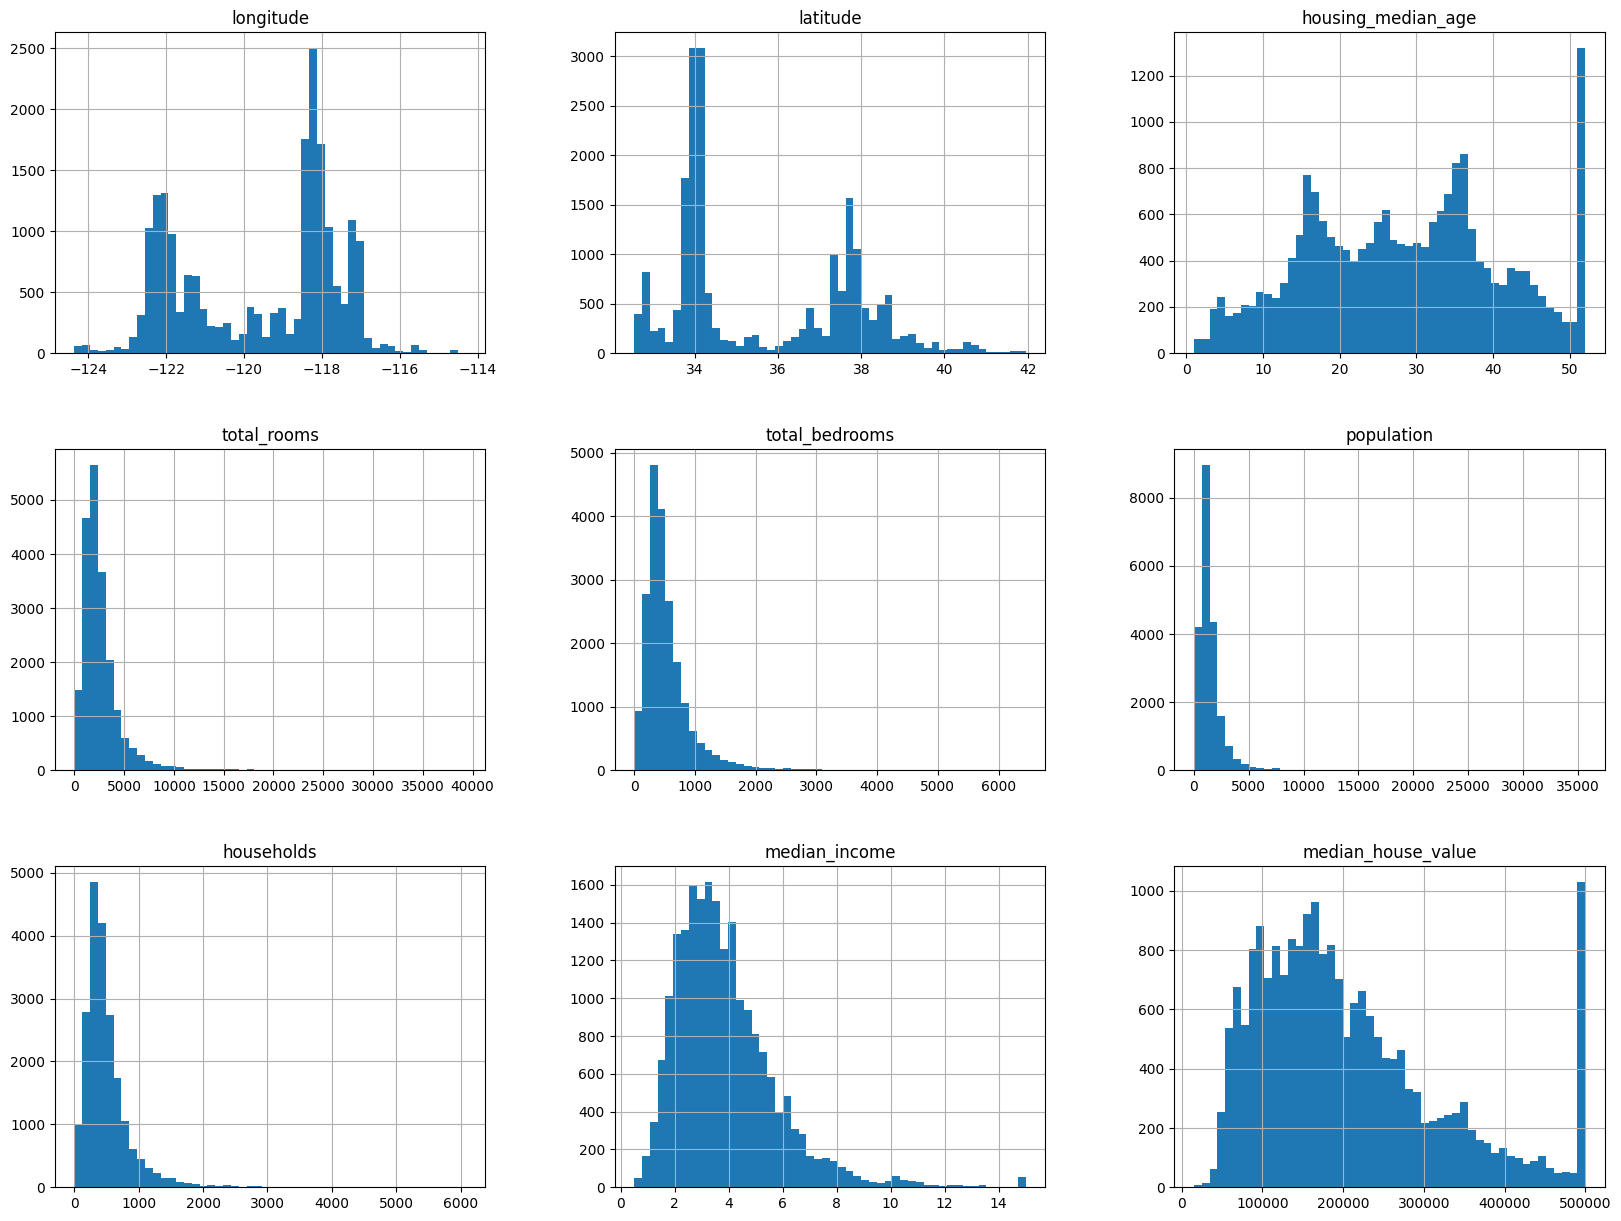

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<h1 style="font-size:20px;">We will use this category to stratisfied split our data</h1>

In [60]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

<h1 style="font-size:20px;">Stratisfied split gives a better representation of our population than randomly splitting it</h1>

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_split=strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [13]:
random_split=test_set["income_cat"].value_counts() / len(test_set)

In [14]:
overall=housing["income_cat"].value_counts() / len(housing)

In [15]:
comp=pd.DataFrame({ "overall":overall,"random_split":random_split,"strat_split":strat_split})

<h1 style="font-size:20px;">As we can see the strat_split is better representation for our overall data</h1>

In [16]:
comp.sort_index()

,overall,random_split,strat_split
income_cat,,,
1,0.039826,0.042393,0.039971
2,0.318847,0.307413,0.318798
3,0.350581,0.345203,0.350533
4,0.176308,0.184109,0.176357
5,0.114438,0.120882,0.114341


In [17]:
housing.drop("income_cat",axis=1,inplace=True)

In [18]:
train=strat_test_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

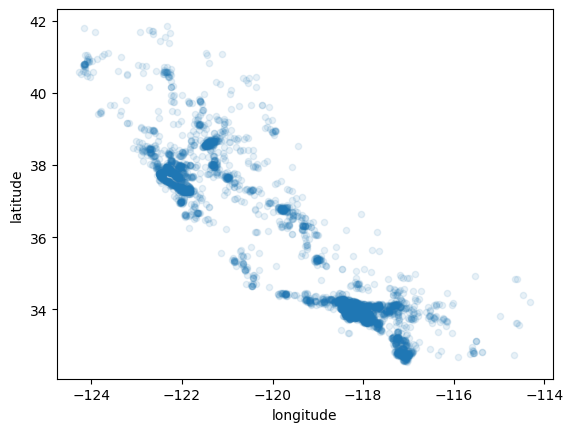

In [19]:
train.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

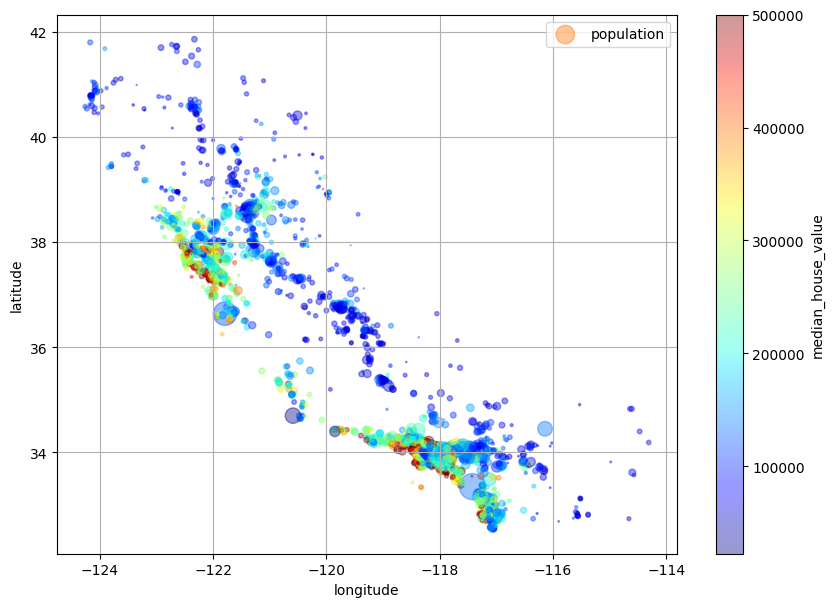

In [20]:
train.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4, grid=True,
             s=train["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

<h1 style="font-size:30px;">This plot looks so cool and also gives us information of multiple categories in one single plot with colour and circle size, how cool right?</h1>

In [21]:
co_mtx = train.corr(numeric_only=True)
co_mtx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926451,-0.129291,0.044672,0.075452,0.085312,0.059555,-0.009866,-0.026768
latitude,-0.926451,1.000000,0.033241,-0.033579,-0.069575,-0.086085,-0.068837,-0.086326,-0.162087
housing_median_age,-0.129291,0.033241,1.000000,-0.359397,-0.330599,-0.279408,-0.314330,-0.087699,0.118976
total_rooms,0.044672,-0.033579,-0.359397,1.000000,0.931803,0.841764,0.927997,0.199430,0.121070
total_bedrooms,0.075452,-0.069575,-0.330599,0.931803,1.000000,0.859042,0.983747,-0.014553,0.029600
population,0.085312,-0.086085,-0.279408,0.841764,0.859042,1.000000,0.884675,0.006730,-0.040286
households,0.059555,-0.068837,-0.314330,0.927997,0.983747,0.884675,1.000000,0.010658,0.043549
median_income,-0.009866,-0.086326,-0.087699,0.199430,-0.014553,0.006730,0.010658,1.000000,0.687091
median_house_value,-0.026768,-0.162087,0.118976,0.121070,0.029600,-0.040286,0.043549,0.687091,1.000000


<h1 style="font-size:20px;">I used seaborn here to see all correalation and damn it looks sicks, and its just better to use when u have more categories</h1>

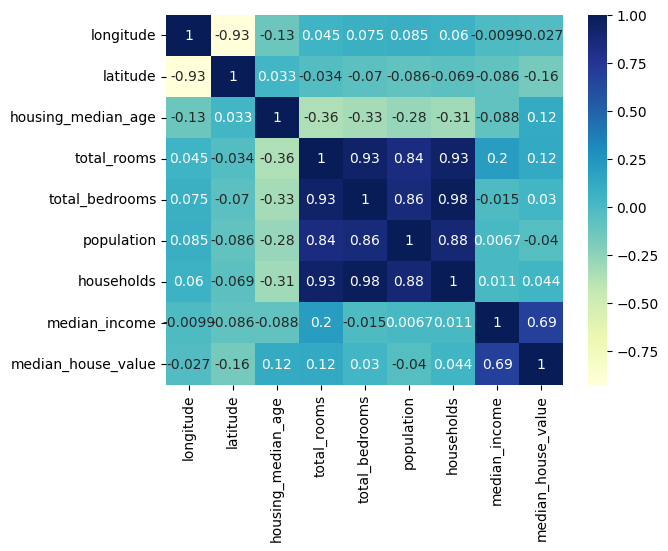

In [22]:
import seaborn as sns
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

<h1 style="font-size:20px;">once finding useful categories we will look at their correlation plot individualy</h1>

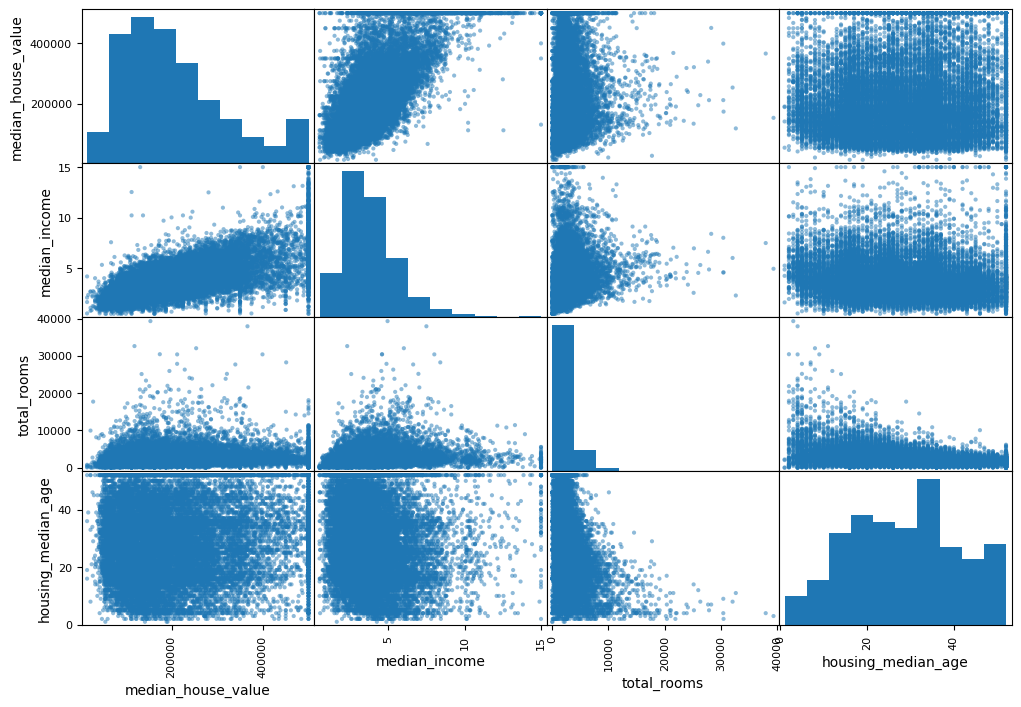

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

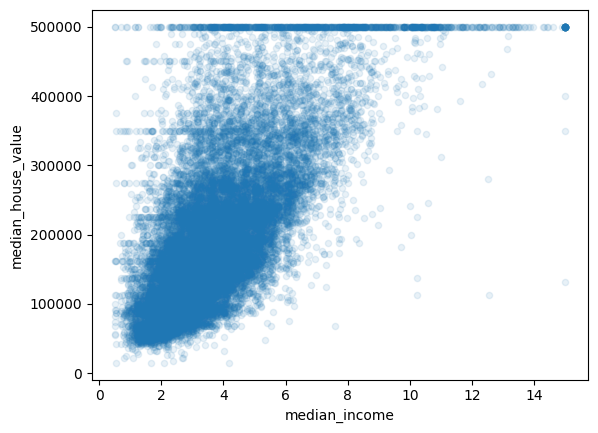

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

<h1 style="font-size:20px;">There are  horizontal line, which does'nt seems nice to have here more many reasons i will deal with it later but we now know that house value and income have a good correlation</h1>

In [25]:
train["rooms_per_household"]=train["total_rooms"]/train["households"]
train["bedrooms_per_rooms"]=train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

<h1 style="font-size:20px;">Here we are trying to make new categories or features which can correlate more with our labels, its called feature engineering</h1>

In [26]:
co_mtx=train.corr(numeric_only=True)
co_mtx["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687091
rooms_per_household         0.198322
total_rooms                 0.121070
housing_median_age          0.118976
households                  0.043549
total_bedrooms              0.029600
population_per_household   -0.025974
longitude                  -0.026768
population                 -0.040286
latitude                   -0.162087
bedrooms_per_rooms         -0.254506
Name: median_house_value, dtype: float64

In [42]:
train_cat=train[["ocean_proximity"]]
train=strat_test_set.drop(["median_house_value","income_cat"],axis=1)
train_labels=strat_test_set["median_house_value"].copy()


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

train_num=train.drop("ocean_proximity",axis=1)
imputer.fit(train_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [44]:
imputer.statistics_

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [45]:
train_num.median().values

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [46]:
x=imputer.transform(train_num)

In [47]:
train_df=pd.DataFrame(x,columns=train_num.columns,index=train_num.index)

In [49]:
train_cat.head(10)

,ocean_proximity
3905,<1H OCEAN
16821,<1H OCEAN
2900,NEAR OCEAN
7193,NEAR OCEAN
13928,NEAR BAY
6523,<1H OCEAN
33,NEAR BAY
15996,<1H OCEAN
18212,NEAR OCEAN
10083,NEAR OCEAN


In [52]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
train_cat_encoded=ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [4.],
       [4.]])

In [53]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [54]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
train_cat_1hot=cat_encoder.fit_transform(train_cat)
train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4128 stored elements and shape (4128, 5)>

In [55]:
train_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], shape=(4128, 5))

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<h1 style="font-size:40px;">I will complete this part a bit later cause im confused with some stuff</h1>